In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
def euler_int(x_values, y0, dydx):
    """
    Numerically integrates a differential equation using a central difference method
    Inputs:
        step: the step to go forward in the x
        x0: the initial x-value
        xmax: the maximum x-value
        y0: the initial y-value
        dydx: the differential equation
    """
    y_values=[]
    y=y0
    step = x_values[1] - x_values[0]
    for x in x_values:
        y_values.append(y)
        y += dydx(y,x)*step
    return y_values

In [5]:
def langevin(x,y):
    k= 0.5
    return k*x + float(np.random.randn(1))

In [6]:
N= 100
x_steps= 20

x_list = np.linspace(0,1,x_steps)
y_lists = np.array([euler_int(
    x_list,
    0,
    langevin
    )
    for n in range(0,N)
    ])

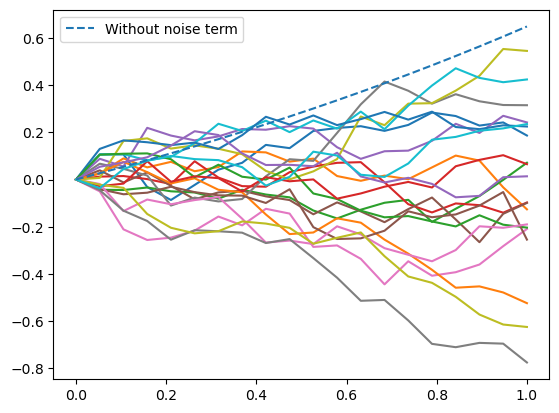

In [7]:
for y_list in y_lists[::5]:
    plt.plot(
        x_list,
        y_list,
        "-"
        )
plt.plot(
    x_list,
    np.exp(0.5*x_list)-1,
    "--",
    label = "Without noise term"
    )
plt.legend()
plt.show()

In [25]:
import scipy.stats as stats

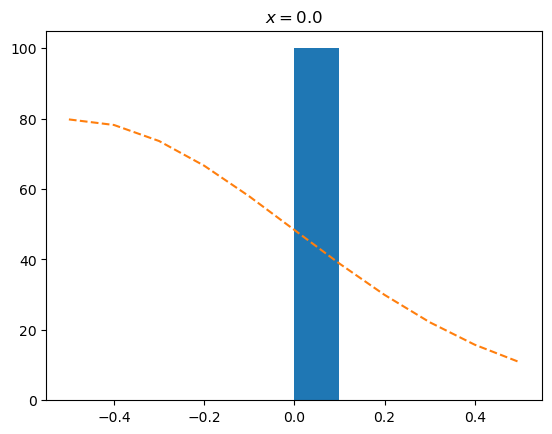

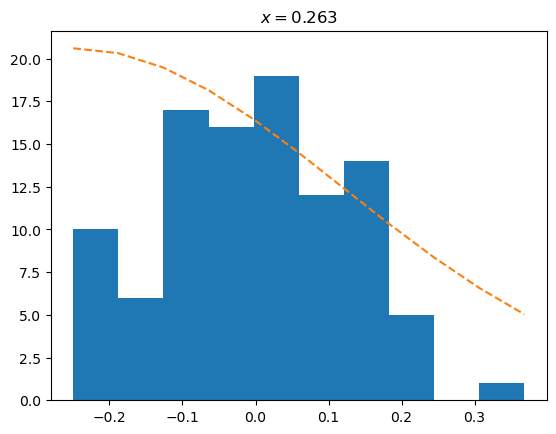

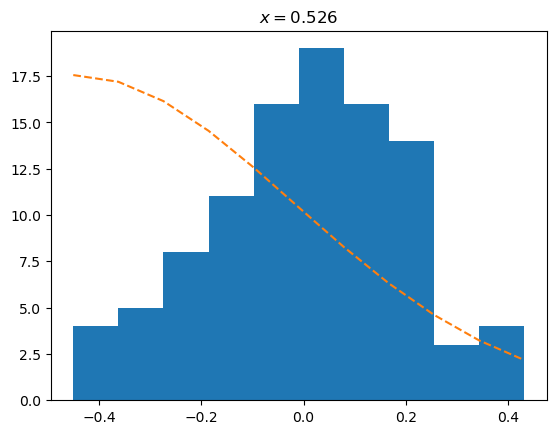

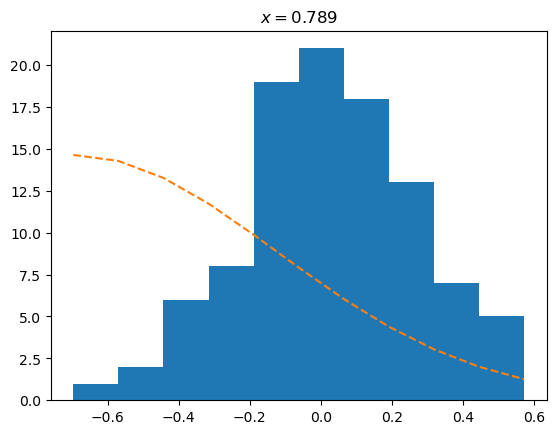

In [27]:
y_frame= pd.DataFrame(y_lists, columns= x_list).transpose()

y_index= [x_list[i] for i in np.arange(0,x_steps,5)]

for i in y_index:
    y_distr= y_frame.loc[i]
    h= plt.hist(y_distr)
    h_max= np.max(h[0])
    h_x= h[1]
    plt.plot(h_x, h_max*stats.norm.pdf(h_x, h_x[0], h_x[-1]), "--")
    plt.title("$x=$" + str(np.round(y_distr.name,3)))
    plt.show()